In [689]:
#Libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import ydata_profiling
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import shapiro
from scipy.optimize import curve_fit

<span style="font-size: 24px; font-weight: bold;">ETL Process</span>  

**Tabla resumen de las fuentes de datos**  
**-------Na y Duplicados**

In [527]:
#excel format Sources (already downloaded) from:
#                           https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

Data_1 = 'Sources\__1__Internet_Penetracion__1-2.xlsx' # 1 y 2 graph.
Data_2 = 'Sources\__2__Internet_BAF__3-4.xlsx' # 3 y 4 graph.
Data_3 = 'Sources\__3__Internet_Accesos-por-tecnologia__5-6.xlsx'# 5 y 6 graph.
Data_4 = 'Sources\__4__historico_velocidad_internet__8-9.xlsx'# 8 y 9 graph.
Data_5 = 'Sources\__5__Internet_Accesos-por-velocidad__10-11.xlsx'# 10 y 11 graph.
Data_6 = 'Sources\__6__Internet_Accesos-por-velocidad_provincia_sin rangos__12.xlsx'# 12 graph.
Data_7 = 'Sources\__7__Internet_Ingresos__13.xlsx'# 13 graph.
Data_8 = 'Sources\__8__Internet_Accesos-por-velocidad_por loc__14.xlsx'# 14 graph.
Data_9 = 'Sources\__9__Internet-Accesos-por-tecno_por_loc__15.xlsx'# 15 graph.
Data_10 = 'Sources\__10__mapa_conectividad__16.xlsx'# 16 graph.

In [528]:
# Por ser tantas sources, se va a mapear todos los temas de calidad de forma masiva por medio de un dataframe
#Creacion de dataframe a cada source y caracteristicas de las mismas
source_11_df = pd.read_excel(Data_1,sheet_name='Penetración-poblacion')
source_12_df = pd.read_excel(Data_1,sheet_name='Penetracion-hogares')
source_13_df = pd.read_excel(Data_1,sheet_name='Penetracion-totales')
source_21_df = pd.read_excel(Data_2,sheet_name='Dial-BAf')
source_22_df = pd.read_excel(Data_2,sheet_name='Totales')
source_31_df = pd.read_excel(Data_3,sheet_name='Totales')
source_32_df = pd.read_excel(Data_3,sheet_name='Accesos Por Tecnología')
source_41_df = pd.read_excel(Data_4,sheet_name='Velocidad % por prov')
source_42_df = pd.read_excel(Data_4,sheet_name='Totales')
source_51_df = pd.read_excel(Data_5,sheet_name='Totales')
source_52_df = pd.read_excel(Data_5,sheet_name='Accesos por velocidad')
source_6_df = pd.read_excel(Data_6,sheet_name='Velocidad_sin_Rangos')
source_7_df = pd.read_excel(Data_7,sheet_name='Ingresos')
source_8_df = pd.read_excel(Data_8,sheet_name='internet_Accesos_por_loc')
source_9_df = pd.read_excel(Data_9,sheet_name='Accesos_tecnologia_localidad')
source_10_df = pd.read_excel(Data_10,sheet_name='Hoja3')

#Listados para la caracterizacion de cada source
sources_list = [source_11_df,source_12_df, source_13_df, source_21_df, source_22_df, source_31_df, source_32_df, source_41_df, source_42_df, source_51_df, source_52_df, source_6_df, source_7_df, source_8_df, source_9_df, source_10_df]
sources_names = ['source_11_df','source_12_df', 'source_13_df', 'source_21_df', 'source_22_df', 'source_31_df', 'source_32_df', 'source_41_df', 'source_42_df', 'source_51_df', 'source_52_df', 'source_6_df', 'source_7_df', 'source_8_df', 'source_9_df', 'source_10_df']
description_sources = [
    '_1_Accesos(X100_hab) - Provincia - Trimestre',
        '_1_Accesos(X100_hogar) - Provincia - Trimestre',
        '_1_Accesos(X100_hogar/hab) - Nacional - Trimestre',
        '_2_Accesos - Provincia - Trimestre',
        '_2_Accesos - Nacional - Trimestre',
        '_3_Accesos - Provincia -  Tecnologia - Trimestre',
        '_3_Accesos - Nacional - Tecnologia - Trimestre',
        '_4_Velocidad - Provincia - Trimestre',
        '_4_Velocidad - Nacional - Trimestre',
        '_5_Accesos - Nacional - Rango Velocidad',
        '_5_Accesos - Provincia - Rango Velocidad - Trimestre',
        '_6_Accesos - Provincia - Velocidad Detallada - Trimestre',
        '_7_Ingresos - Nacional - Trimestre',
        '_8_Accesos - Provincia - Localidad - Partido - Velocidad Detallada',
        '_9_Accesos - Provincia - Localidad - Partido - Tecnologia',
        '_10_Conectividad - Provincia - Localidad - Partido - Tecnologia'
        ]

In [529]:
#Revision de total elementos de cada dataframe y sus faltantes (na), duplicados y cantidad de columnas, para cada source and their sheets

cantidad_celdas_na = []
cantidad_rows_duplicados = []
cantidad_celdas_total = []
cantidad_rows_total = []
conteo = 0
sources_df = pd.DataFrame()

for i in sources_list:
    #print(type(i))
    #print('-------------------------------------------------------------------------------------------')
    cantidad_rows_total=i.shape[0]
    cantidad_celdas_total=((i.shape[0])*(len(i.columns)))
    cantidad_celdas_na=i.isna().sum().sum()
    cantidad_rows_duplicados=i.duplicated().sum()

    nombre_source = sources_names[conteo]
    descripcion_source = description_sources[conteo]
    
    duplicados_porcentage = round((cantidad_rows_duplicados/ cantidad_rows_total)*100,0)
    na_porcentage = round((cantidad_celdas_na / cantidad_celdas_total)*100,0)

    diccionario = {'nombre_source':nombre_source,
             "cantidad_rows_total":cantidad_rows_total,
             "cantidad_celdas_total":cantidad_celdas_total,
             "cantidad_celdas_na":cantidad_celdas_na,
             "na_porcentage":na_porcentage, 
             "cantidad_rows_duplicados":cantidad_rows_duplicados,
             "duplicados_porcentage":duplicados_porcentage,
             "cantidad_columnas":len(i.columns),
             "descripcion_source":descripcion_source,
             "columns": i.columns.to_numpy().tolist()}
    sources_df = pd.concat([sources_df,pd.DataFrame([diccionario])], ignore_index=True)
    conteo += 1
    
sources_df

,nombre_source,cantidad_rows_total,cantidad_celdas_total,cantidad_celdas_na,na_porcentage,cantidad_rows_duplicados,duplicados_porcentage,cantidad_columnas,descripcion_source,columns
0,source_11_df,864,3456,0,0.0,0,0.0,4,_1_Accesos(X100_hab) - Provincia - Trimestre,"[Año, Trimestre, Provincia, Accesos por cada 1..."
1,source_12_df,864,3456,0,0.0,0,0.0,4,_1_Accesos(X100_hogar) - Provincia - Trimestre,"[Año, Trimestre, Provincia, Accesos por cada 1..."
2,source_13_df,36,180,0,0.0,0,0.0,5,_1_Accesos(X100_hogar/hab) - Nacional - Trimestre,"[Año, Trimestre, Accesos por cada 100 hogares,..."
3,source_21_df,864,5184,2,0.0,0,0.0,6,_2_Accesos - Provincia - Trimestre,"[Año, Trimestre, Provincia, Banda ancha fija, ..."
4,source_22_df,36,216,0,0.0,0,0.0,6,_2_Accesos - Nacional - Trimestre,"[Año, Trimestre, Banda ancha fija, Dial up, To..."
5,source_31_df,36,324,0,0.0,0,0.0,9,_3_Accesos - Provincia - Tecnologia - Trimestre,"[Año, Trimestre, ADSL, Cablemodem, Fibra óptic..."
6,source_32_df,866,15588,7635,49.0,0,0.0,18,_3_Accesos - Nacional - Tecnologia - Trimestre,"[Año, Trimestre, Provincia, ADSL, Cablemodem, ..."
7,source_41_df,864,3456,0,0.0,0,0.0,4,_4_Velocidad - Provincia - Trimestre,"[Año, Trimestre, Provincia, Mbps (Media de baj..."
8,source_42_df,36,144,0,0.0,0,0.0,4,_4_Velocidad - Nacional - Trimestre,"[Año, Trimestre, Mbps (Media de bajada), Trime..."
9,source_51_df,36,396,0,0.0,0,0.0,11,_5_Accesos - Nacional - Rango Velocidad,"[Año, Trimestre, Hasta 512 kbps, Entre 512 Kbp..."


In [530]:
# Sources con na o Duplicados
sources_df[(sources_df['cantidad_celdas_na']>0) | (sources_df['cantidad_rows_duplicados']>0)]

,nombre_source,cantidad_rows_total,cantidad_celdas_total,cantidad_celdas_na,na_porcentage,cantidad_rows_duplicados,duplicados_porcentage,cantidad_columnas,descripcion_source,columns
3,source_21_df,864,5184,2,0.0,0,0.0,6,_2_Accesos - Provincia - Trimestre,"[Año, Trimestre, Provincia, Banda ancha fija, ..."
6,source_32_df,866,15588,7635,49.0,0,0.0,18,_3_Accesos - Nacional - Tecnologia - Trimestre,"[Año, Trimestre, Provincia, ADSL, Cablemodem, ..."
10,source_52_df,864,12960,2596,20.0,0,0.0,15,_5_Accesos - Provincia - Rango Velocidad - Tri...,"[Año, Trimestre, Provincia, HASTA 512 kbps, + ..."
11,source_6_df,505,93930,185,0.0,0,0.0,186,_6_Accesos - Provincia - Velocidad Detallada -...,"[Año, Trimestre, Provincia, Otros, 0,256 Mbps,..."
13,source_8_df,3095,414730,380477,92.0,0,0.0,134,_8_Accesos - Provincia - Localidad - Partido -...,"[Provincia, Partido, Localidad, Link Indec, Ot..."
15,source_10_df,4311,68976,12,0.0,0,0.0,16,_10_Conectividad - Provincia - Localidad - Par...,"[Provincia, Partido, Localidad, Población, ADS..."


In [531]:
#Sources con gran cantidad de columnas
temporal = sources_df[['nombre_source','cantidad_columnas',]]
temporal.sort_values(by='cantidad_columnas', ascending=False)


,nombre_source,cantidad_columnas
11,source_6_df,186
13,source_8_df,134
6,source_32_df,18
15,source_10_df,16
10,source_52_df,15
14,source_9_df,13
9,source_51_df,11
5,source_31_df,9
3,source_21_df,6
4,source_22_df,6


**Primeros hallazgoz en terminos de calidad de los datos:**  

- Se identifica que 6 de las 16 bases tienen celdas "na". se procedera a corregirlo  
- Se identifica que no hay duplicados en ninguna de las bases  
- Se identifican 2 sources que tienen demasiadas columnas, posiblemente se pueden eliminar varias.

**Correccion de los "NaN"**

In [532]:
# las bases que registran grandes cantidades de "na" vamos revisar source_21_df. Solo 2 na

source_21_df.head(1)
source_21_df.isna().sum()# se identifica que es en la columna "Dial up"
source_21_df[source_21_df['Dial up'].isna()] # se identifica que los "na" son de las provincias Formosa y Misiones
source_21_df[(source_21_df['Provincia']=='Formosa') & (source_21_df['Año']==2018)] # Se identifica que par ala provincia de Formosa en el año 2018 el resto de trimestres tuvo cero, por lo que se agregara cero donde tiene un "nan"
source_21_df[(source_21_df['Provincia']=='Misiones') & (source_21_df['Año']==2018)] # Se identifica que par ala provincia de Misiones en el año 2018 el resto de trimestres tuvo cero, por lo que se agregara cero donde tiene un "nan"
source_21_df['Dial up'] = source_21_df['Dial up'].fillna(0)

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_8_df.isna().sum().sum() / (len(source_8_df.columns)*source_8_df.shape[0]))*100
print(Nuevo_Faltante)
source_21_df.isna().sum()

91.7408916644564


Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64

In [533]:
# las bases que registran grandes cantidades de "na" vamos revisar source_32_df

source_32_df.head(20) # Se identifica que las columnas despues de la columna total no son necesarias
source_32_df = source_32_df[['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica','Wireless', 'Otros', 'Total']]
source_32_df.fillna(0, inplace=True)# Adicional los pocos na, se reemplazan con ceros

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_32_df.isna().sum().sum() / (len(source_32_df.columns)*source_32_df.shape[0]))*100
print(Nuevo_Faltante)
source_32_df.isna().sum()

0.0


C:\Users\otalo\AppData\Local\Temp\ipykernel_3908\2057491800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_32_df.fillna(0, inplace=True)# Adicional los pocos na, se reemplazan con ceros


Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [534]:
# las bases que registran grandes cantidades de "na" vamos revisar source_52_df

source_52_df.head(20) # Se identifica que las columnas despues de la columna total no son necesarias
source_52_df = source_52_df[['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps','+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS','Total']]
source_52_df.fillna(0, inplace=True)# Adicional los pocos na, se reemplazan con ceros

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_52_df.isna().sum().sum() / (len(source_52_df.columns)*source_52_df.shape[0]))*100
print(Nuevo_Faltante)
source_52_df.isna().sum()

0.0


C:\Users\otalo\AppData\Local\Temp\ipykernel_3908\111088308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_52_df.fillna(0, inplace=True)# Adicional los pocos na, se reemplazan con ceros


Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

In [535]:
# las bases que registran grandes cantidades de "na" vamos revisar source_6_df

source_6_df.head(1) # Se concluye que todas las columnas son necesarias

temporal = source_6_df.isna().sum()# se identifica que es en la columna "Dial up"
len(temporal)
temporal[temporal>0]# se identifica que casi todas las columnas (menos 1) tienen de un "na"

source_6_df[source_6_df['Año'].isna()] # Se identifica que toda la fila es "na"
source_6_df.dropna(inplace=True)# Se elimina esta fila.

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_6_df.isna().sum().sum() / (len(source_6_df.columns)*source_6_df.shape[0]))*100
print(Nuevo_Faltante)
source_6_df.isna().sum()

0.0


Año           0
Trimestre     0
Provincia     0
Otros         0
0,256 Mbps    0
             ..
5125 Mbps     0
6000 Mbps     0
7000 Mbps     0
8000 Mbps     0
10000 Mbps    0
Length: 186, dtype: int64

In [536]:
# las bases que registran grandes cantidades de "na" vamos revisar source_8_df

source_8_df.head(20) # Se concluye que todas las columnas son necesarias
source_8_df.isna().sum() # Se identifica que los "na" hacen referencia solo a las velocidades. Donde hay un "na" en el cruce velocidad y provincia hace referencia a que no hay accesos, por ello todos los "na" se rellenan con ceros
source_8_df.fillna(0, inplace=True)
source_8_df

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_8_df.isna().sum().sum() / (len(source_8_df.columns)*source_8_df.shape[0]))*100
print(Nuevo_Faltante)
source_8_df.isna().sum()

0.0


Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros            0
                ..
900 Mbps         0
950 Mbps         0
1000 Mbps        0
1024 Mbps        0
Total general    0
Length: 134, dtype: int64

In [537]:
# las bases que registran grandes cantidades de "na" vamos revisar source_10_df

source_10_df.head(1)
source_10_df.isna().sum()# Se identifica que es en la columna link
source_10_df[source_10_df['Link'].isna()]# Se identifica que todos son de el partido Antartida Argentina
source_10_df[source_10_df['Partido']=='ANTARTIDA ARGENTINA'] # Se concluye que este Partido no tiene asignacion de Link
print(source_10_df.shape)

#Remove rows that dont have relevant data
source_10_df = source_10_df.loc[~((source_10_df['Partido']=='ANTARTIDA ARGENTINA') & (~source_10_df['Localidad'].isin(['Base Esperanza','Base Marambio'])))]
source_10_df.shape

#Fill with cero where there are "na". only 2 rows in 1 column.
source_10_df.fillna(0,inplace=True)

#Calculo de % de faltante que hay en todo el dataframe
Nuevo_Faltante = (source_10_df.isna().sum().sum() / (len(source_10_df.columns)*source_10_df.shape[0]))*100
print(Nuevo_Faltante)
source_10_df.isna().sum()

(4311, 16)
0.0


C:\Users\otalo\AppData\Local\Temp\ipykernel_3908\2203817223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_10_df.fillna(0,inplace=True)


Provincia         0
Partido           0
Localidad         0
Población         0
ADSL              0
Cablemódem        0
Dial Up           0
Fibra óptica      0
Satelital         0
Wireless          0
Telefonía Fija    0
3G                0
4G                0
Link              0
Latitud           0
Longitud          0
dtype: int64

In [538]:
# Correr nuevamente resumen de calidad de los data sources, para validar todo correcto
sources_list = [source_11_df,source_12_df, source_13_df, source_21_df, source_22_df, source_31_df, source_32_df, source_41_df, source_42_df, source_51_df, source_52_df, source_6_df, source_7_df, source_8_df, source_9_df, source_10_df]
sources_names = ['source_11_df','source_12_df', 'source_13_df', 'source_21_df', 'source_22_df', 'source_31_df', 'source_32_df', 'source_41_df', 'source_42_df', 'source_51_df', 'source_52_df', 'source_6_df', 'source_7_df', 'source_8_df', 'source_9_df', 'source_10_df']
description_sources = [
    '_1_Accesos(X100_hab) - Provincia - Trimestre',
        '_1_Accesos(X100_hogar) - Provincia - Trimestre',
        '_1_Accesos(X100_hogar/hab) - Nacional - Trimestre',
        '_2_Accesos - Provincia - Trimestre',
        '_2_Accesos - Nacional - Trimestre',
        '_3_Accesos - Provincia -  Tecnologia - Trimestre',
        '_3_Accesos - Nacional - Tecnologia - Trimestre',
        '_4_Velocidad - Provincia - Trimestre',
        '_4_Velocidad - Nacional - Trimestre',
        '_5_Accesos - Nacional - Rango Velocidad',
        '_5_Accesos - Provincia - Rango Velocidad - Trimestre',
        '_6_Accesos - Provincia - Velocidad Detallada - Trimestre',
        '_7_Ingresos - Nacional - Trimestre',
        '_8_Accesos - Provincia - Localidad - Partido - Velocidad Detallada',
        '_9_Accesos - Provincia - Localidad - Partido - Tecnologia',
        '_10_Conectividad - Provincia - Localidad - Partido - Tecnologia'
        ]

#Revision de total elementos de cada dataframe y sus faltantes (na) y duplicados, para cada source and their sheets

cantidad_celdas_na = []
cantidad_rows_duplicados = []
cantidad_celdas_total = []
cantidad_rows_total = []
conteo = 0
sources_df = pd.DataFrame()

for i in sources_list:
    #print(type(i))
    #print('-------------------------------------------------------------------------------------------')
    cantidad_rows_total=i.shape[0]
    cantidad_celdas_total=((i.shape[0])*(len(i.columns)))
    cantidad_celdas_na=i.isna().sum().sum()
    cantidad_rows_duplicados=i.duplicated().sum()

    nombre_source = sources_names[conteo]
    descripcion_source = description_sources[conteo]
    
    duplicados_porcentage = round((cantidad_rows_duplicados/ cantidad_rows_total)*100,0)
    na_porcentage = round((cantidad_celdas_na / cantidad_celdas_total)*100,0)

    diccionario = {'nombre_source':nombre_source,
             "cantidad_rows_total":cantidad_rows_total,
             "cantidad_celdas_total":cantidad_celdas_total,
             "cantidad_celdas_na":cantidad_celdas_na,
             "na_porcentage":na_porcentage, 
             "cantidad_rows_duplicados":cantidad_rows_duplicados,
             "duplicados_porcentage":duplicados_porcentage,
             "cantidad_columnas":len(i.columns),
             "descripcion_source":descripcion_source,
             "columns": i.columns.to_numpy().tolist()}
    sources_df = pd.concat([sources_df,pd.DataFrame([diccionario])], ignore_index=True)
    conteo += 1
    
sources_df

,nombre_source,cantidad_rows_total,cantidad_celdas_total,cantidad_celdas_na,na_porcentage,cantidad_rows_duplicados,duplicados_porcentage,cantidad_columnas,descripcion_source,columns
0,source_11_df,864,3456,0,0.0,0,0.0,4,_1_Accesos(X100_hab) - Provincia - Trimestre,"[Año, Trimestre, Provincia, Accesos por cada 1..."
1,source_12_df,864,3456,0,0.0,0,0.0,4,_1_Accesos(X100_hogar) - Provincia - Trimestre,"[Año, Trimestre, Provincia, Accesos por cada 1..."
2,source_13_df,36,180,0,0.0,0,0.0,5,_1_Accesos(X100_hogar/hab) - Nacional - Trimestre,"[Año, Trimestre, Accesos por cada 100 hogares,..."
3,source_21_df,864,5184,0,0.0,0,0.0,6,_2_Accesos - Provincia - Trimestre,"[Año, Trimestre, Provincia, Banda ancha fija, ..."
4,source_22_df,36,216,0,0.0,0,0.0,6,_2_Accesos - Nacional - Trimestre,"[Año, Trimestre, Banda ancha fija, Dial up, To..."
5,source_31_df,36,324,0,0.0,0,0.0,9,_3_Accesos - Provincia - Tecnologia - Trimestre,"[Año, Trimestre, ADSL, Cablemodem, Fibra óptic..."
6,source_32_df,866,7794,0,0.0,0,0.0,9,_3_Accesos - Nacional - Tecnologia - Trimestre,"[Año, Trimestre, Provincia, ADSL, Cablemodem, ..."
7,source_41_df,864,3456,0,0.0,0,0.0,4,_4_Velocidad - Provincia - Trimestre,"[Año, Trimestre, Provincia, Mbps (Media de baj..."
8,source_42_df,36,144,0,0.0,0,0.0,4,_4_Velocidad - Nacional - Trimestre,"[Año, Trimestre, Mbps (Media de bajada), Trime..."
9,source_51_df,36,396,0,0.0,0,0.0,11,_5_Accesos - Nacional - Rango Velocidad,"[Año, Trimestre, Hasta 512 kbps, Entre 512 Kbp..."


**Tabla resumen Formato de las columnas** --  Validacion (cada source)

In [539]:
# Lo mismo que se aplico para na y duplicados, se aplica para validar el formato de las columnas

#Listados para la caracterizacion de cada source
sources_list = [source_11_df,source_12_df, source_13_df, source_21_df, source_22_df, source_31_df, source_32_df, source_41_df, source_42_df, source_51_df, source_52_df, source_6_df, source_7_df, source_8_df, source_9_df, source_10_df]
sources_names = ['source_11_df','source_12_df', 'source_13_df', 'source_21_df', 'source_22_df', 'source_31_df', 'source_32_df', 'source_41_df', 'source_42_df', 'source_51_df', 'source_52_df', 'source_6_df', 'source_7_df', 'source_8_df', 'source_9_df', 'source_10_df']

#Revision de total elementos de cada dataframe y sus faltantes (na) y duplicados, para cada source and their sheets

conteo = 0
sources_df_format = pd.DataFrame()

for i in sources_list:
    df = i.dtypes.to_frame(name='type').reset_index().rename(columns={'index':"columna"})
    df.insert(0,"source_name", sources_names[conteo])
    sources_df_format = pd.concat([sources_df_format,df], ignore_index=True)
    
    conteo += 1
    
    
sources_df_format

,source_name,columna,type
0,source_11_df,Año,int64
1,source_11_df,Trimestre,int64
2,source_11_df,Provincia,object
3,source_11_df,Accesos por cada 100 hab,float64
4,source_12_df,Año,int64
...,...,...,...
422,source_10_df,3G,object
423,source_10_df,4G,object
424,source_10_df,Link,float64
425,source_10_df,Latitud,float64


In [540]:
# Agrupacion de columnas e identificacion de sus tipo de dato
sources_df_format['columna'].value_counts() # en source 6 y 8, gran parte de las columnas eran de velocidad, por ello partimos el analisis de la siguiente manera:

# Agrupar las columnas con terminacion Mbps
sources_df_format['nueva'] = sources_df_format['columna'].apply(lambda x: x[-4:])
sources_df_format['nueva'].value_counts() # de las 427 columnas, 322 es en relacion a la velocidad del internet (Mbps)

# Seccionar en 3 el analisis del tipo de cada columna:

# Primero analizamos las columnas en relacion a la velocidad de internet (Mbps):
sources_df_format[sources_df_format['nueva']=='Mbps']['type'].unique() # se concluye que todas tienen formato numerico (int64 o float). Lo cual hace sentido.

# Segundo analizamos las columnas que no tienen que ver con la velocidad del internet:
sources_df_format[sources_df_format['nueva']!='Mbps'].shape[0] # son 105 columnas que hace falta por revisar
#   Agrupamos por nombres desde el mas repetido hasta 3 veces
sources_df_format[sources_df_format['nueva']!='Mbps']['columna'].value_counts() # columnas con mayor repeticion
sources_df_format[sources_df_format['columna']=='Año'] # Debe ser numerico. Se encuentra en el source_32_df type object. ------- REVISAR.
sources_df_format[sources_df_format['columna']=='Trimestre'] # Debe ser numerico. Se encuentra en el source_32_df type object. ------- REVISAR.
sources_df_format[sources_df_format['columna']=='Provincia'] # Debe ser object.
sources_df_format[sources_df_format['columna']=='Total'] # Debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='Periodo'] # Debe ser Date. pero ya tenemos la info de la fecha con Año y Trimestre. todo OK.
sources_df_format[sources_df_format['columna']=='Otros'] # Debe ser numerico. todo OK.
sources_df_format[sources_df_format['columna']=='ADSL'] # Debe ser numerico en source 31,32 y 9, en source 10 debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='Fibra óptica'] # Debe ser numerico en source 31,32, en source 10 debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='Localidad'] # Debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='OTROS'] # Debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='Wireless'] # Debe ser numerico en source 31,32, en source 10 debe ser object. todo OK.
sources_df_format[sources_df_format['columna']=='Partido'] # Debe ser object. todo OK.

# Tercero analizamos el resto de columnas que estan repetidas entre 2 y 1 veces:
columnas_revisadas = ['Año','Trimestre','Provincia','Total','Periodo','Otros','ADSL','Fibra óptica','Localidad','OTROS','Wireless''Partido']
sources_df_format[(sources_df_format['nueva']!='Mbps') & (~sources_df_format['columna'].isin(columnas_revisadas)) ][['source_name','columna','type']].sort_values(by='columna')
    #source_8_df y #source_9_df revisar la columna Link Indec. Pareciera que deberia ser numerico y es object...................REVISAR
    #source_42_df revisar columna Trimestre.1. Deberia ser numerico y es object..................REVISAR

,source_name,columna,type
422,source_10_df,3G,object
423,source_10_df,4G,object
11,source_13_df,Accesos por cada 100 hab,float64
3,source_11_df,Accesos por cada 100 hab,float64
10,source_13_df,Accesos por cada 100 hogares,float64
7,source_12_df,Accesos por cada 100 hogares,float64
16,source_21_df,Banda ancha fija,int64
21,source_22_df,Banda ancha fija,int64
403,source_9_df,CABLEMODEM,int64
38,source_32_df,Cablemodem,float64


**hallazgoz en terminos de calidad de los datos (formato):**  

- source_32_df revisar la columna Trimestre y Año. Debe ser numerico y es type object.  
- source_8_df y #source_9_df. Son numeros, pero es un codigo identificador, por lo que hace sentido que sea object.  
- source_42_df y columna Trimestre.1. Convertir en formato fecha.

**Correccion de Formato**

Correcion **source_32_df** - Trimestre

In [541]:
# TRIMESTRE
#Visual de elementos que no son numero en la columna Trimestre
source_32_df[~source_32_df['Trimestre'].apply(pd.to_numeric, errors='coerce').notna()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
312,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
313,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
314,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
315,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
316,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
380,2019 *,1 *,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0
381,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
382,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0
383,2019 *,1 *,Tucumán,159215.0,11670.0,118.0,678.0,321.0,172002.0


In [542]:
# Correccion source_32_df columna Trimestre.
source_32_df[~source_32_df['Trimestre'].apply(pd.to_numeric, errors='coerce').notna()]['Trimestre'].unique() # se identifica que en vez de 3,2,1 timetres, colocaron: 3 *,2 *,1 *. CORREGIR
                                                                                                             # Adicional se encontro un comentario en el campo trimestre y el resto de columnas estan vacias. ELIMINAR esta row.


array(['3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [543]:
#Replace elementos de la columna Trimestre
source_32_df['Trimestre'].replace('3 *', 3 , inplace=True)
source_32_df['Trimestre'].replace('2 *', 2 , inplace=True)
source_32_df['Trimestre'].replace('1 *', 1 , inplace=True)

In [544]:
#Remove elemento que no hace sentido en la columna trimestre

# Extraer el texto de la celda de la columna trimestre
texto_to_extract = source_32_df[~source_32_df['Trimestre'].apply(pd.to_numeric, errors='coerce').notna()]['Trimestre'].tolist()[0] 
#Extraer el numero de index que tiene
index_row = source_32_df[source_32_df['Trimestre']==texto_to_extract].index[0]
#eliminar esta row acorde al index extraido
source_32_df.drop(index_row, inplace=True)

#Validar que ya no se tenga esta row
source_32_df[~source_32_df['Trimestre'].apply(pd.to_numeric, errors='coerce').notna()]['Trimestre']

#Validar el formato de la source
source_32_df['Trimestre'] = source_32_df['Trimestre'].astype('int64')
source_32_df.dtypes

Año              object
Trimestre         int64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Correcion **source_32_df** - Año

In [545]:
# Año
#Visual de elementos que no son numero en la columna Trimestre
source_32_df[~source_32_df['Año'].apply(pd.to_numeric, errors='coerce').notna()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
312,2019 *,3,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
313,2019 *,3,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
314,2019 *,3,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
315,2019 *,3,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
316,2019 *,3,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
379,2019 *,1,Santa Cruz,10659.0,4615.0,382.0,6514.0,2735.0,24905.0
380,2019 *,1,Santa Fe,340038.0,340344.0,15621.0,23215.0,17860.0,737078.0
381,2019 *,1,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
382,2019 *,1,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0


In [546]:
# Correccion source_32_df columna Año.
source_32_df[~source_32_df['Año'].apply(pd.to_numeric, errors='coerce').notna()]['Año'].unique() # se identifica que en vez de 2019 en el Año, colocaron: 2019 *. CORREGIR

array(['2019 *'], dtype=object)

In [547]:
#Replace elementos de la columna Trimestre
source_32_df['Año'].replace('2019 *', 2019 , inplace=True)
#Validar correcion
source_32_df[~source_32_df['Año'].apply(pd.to_numeric, errors='coerce').notna()]['Año'].unique()

array([], dtype=int64)

In [548]:
#Validar el formato de la source
source_32_df['Año'] = source_32_df['Año'].astype('int64')
source_32_df.dtypes

Año               int64
Trimestre         int64
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Correcion **source_42_df** - Trimestre - Formato fecha

In [549]:
# Mapping de relacion meses y numero
meses_mapping = {
    'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'
}

In [550]:
#Transformacion de Trimestre.1 a nueva columna con formato fecha.
source_42_df['Fecha'] = source_42_df['Trimestre.1'].apply(lambda x: '01-' + meses_mapping[x[:3]] + '-' + x[-4:])

#Eliminar la columna Trimestre
source_42_df = source_42_df[['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Fecha']]
source_42_df

# Pasar a formato de fecha
source_42_df['Fecha'] = pd.to_datetime(source_42_df['Fecha'], format='%d-%m-%Y')
source_42_df.dtypes

C:\Users\otalo\AppData\Local\Temp\ipykernel_3908\2469016169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_42_df['Fecha'] = pd.to_datetime(source_42_df['Fecha'], format='%d-%m-%Y')


Año                                int64
Trimestre                          int64
Mbps (Media de bajada)           float64
Fecha                     datetime64[ns]
dtype: object

<span style="font-size: 24px; font-weight: bold;">EDA</span>  

<span style="font-size: 24px; font-weight: bold;">Analisis Nacional ----- Accesos</span>  

In [551]:
#Generalidad de la base de datos
sources_df[sources_df['nombre_source']=='source_13_df'][['nombre_source', 'cantidad_rows_total','cantidad_columnas', 'descripcion_source','columns']]

,nombre_source,cantidad_rows_total,cantidad_columnas,descripcion_source,columns
2,source_13_df,36,5,_1_Accesos(X100_hogar/hab) - Nacional - Trimestre,"[Año, Trimestre, Accesos por cada 100 hogares,..."


In [552]:
#Analisis estadistico de los datos. Fuente
report = ProfileReport(source_13_df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [553]:
#Prueba de distribucion normal
_, p_value = shapiro(source_13_df['Accesos por cada 100 hogares'])

if p_value < 0.05:
    print(f"Los datos no siguen una distribución normal.{p_value}")
else:
    print(f"Los datos podrían seguir una distribución normal.{p_value}")

Los datos no siguen una distribución normal.0.022001953795552254


**Hallazgos:**  
- Se observa que ya no hay problemas de calidad (duplicados y nulos).
- Baja variabilidad de los datos (accesos por cada 100 hogares) ya que el coeficiente de variacion es 0.14 y la desviacion estandar (8.5) es menor que el rango intercuartilico (13.47). la media esta muy cerca de la mediana.
- Se evidencia que:
    - la tendencia central (50% de los datos) esta entre entre el rango de 53.2 a 66.6 .
    - la mayoria (95%) de los datos estan entre 49.5 a 76.13. no hay datos atipicos extremos.

In [561]:
#Concatener Año y Trimestre. Inicialmente tipo numero para calculo de tendencia (minimos cuadrados)
source_13_df['Año-Trim'] = source_13_df['Año'].astype(str) +'-'+ source_13_df['Trimestre'].astype(str)

source_13_df.head(1)


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo,Año-Trim
0,2022,4,77.21,24.15,Oct-Dic 2022,2022-4


In [563]:
#Realizar la suma por Año y Trimestre. Para grafico
trend_nacional_Access_100 = pd.pivot_table(data =source_13_df,index=['Año','Año-Trim'],values='Accesos por cada 100 hogares', aggfunc='sum').reset_index()
trend_nacional_Access_100.tail(1)

,Año,Año-Trim,Accesos por cada 100 hogares
35,2022,2022-4,77.21


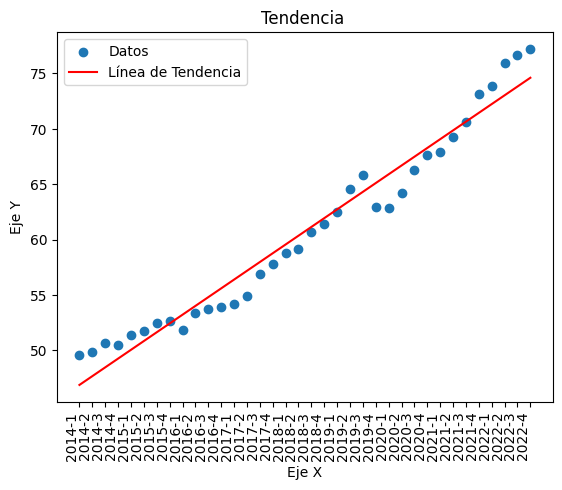

In [564]:
#Calculo de Tendencia con Sk-learn
x = trend_nacional_Access_100.index.values
y = trend_nacional_Access_100['Accesos por cada 100 hogares'].values

X = x.reshape(-1, 1)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Obtener las predicciones de la línea de tendencia
trend_line = modelo.predict(X)

# Crear la gráfica
plt.scatter(trend_nacional_Access_100['Año-Trim'], y, label='Datos')
plt.plot(trend_nacional_Access_100['Año-Trim'], trend_line, label='Línea de Tendencia', color='red')
plt.xticks(rotation=90, ha='right')

# Personalizar la gráfica
plt.title('Tendencia ')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

# Mostrar la gráfica
plt.show()

In [565]:
#Calculo del coeficiente de determinacion (R2)
r2 = r2_score(y, trend_line)
print(f'Coeficiente de Determinacion es: {r2}')

Coeficiente de Determinacion es: 0.9611860308408758


Se encuentra que el coeficiente de determinacion es 0.96, lo cual significa que la regresion lineal representa muy bien las observaciones. Procedemos a proyectar a futuro como se veria el crecimiento de los accesos cada 100 hogares.

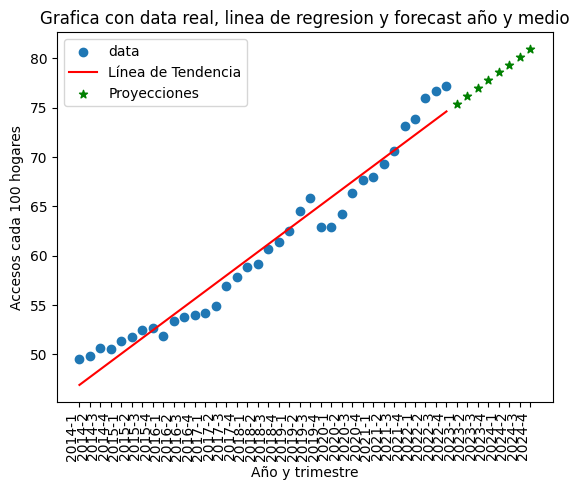

In [566]:
#Proyeccion de los datos medio año hacia adelante
nuevos_trim = (np.array([36,37,38,39,40,41,42,43])).reshape(-1,1)
proyecciones = modelo.predict(nuevos_trim)

#Crear grafico
plt.scatter(x,y, label='data')
plt.plot(x,trend_line,label='Línea de Tendencia', color='red')

#Agregar nuevos datos
plt.scatter(nuevos_trim, proyecciones, color='green', label='Proyecciones',marker='*')

#Cambio eje x
eje_x = trend_nacional_Access_100.index.tolist() + [36,37,38,39,40,41,42,43]
eje_x_nuevo = trend_nacional_Access_100['Año-Trim'].tolist() + ['2023-1','2023-2','2023-3','2023-4','2024-1','2024-2','2024-3','2024-4']
plt.xticks(eje_x,eje_x_nuevo, rotation=90, ha='right')


plt.title('Grafica con data real, linea de regresion y forecast año y medio')
plt.xlabel('Año y trimestre')
plt.ylabel('Accesos cada 100 hogares')
plt.legend()
plt.show()

[Text(0, 0, '50'),
 Text(0, 0, '52'),
 Text(0, 0, '53'),
 Text(0, 0, '56'),
 Text(0, 0, '60'),
 Text(0, 0, '64'),
 Text(0, 0, '65'),
 Text(0, 0, '70'),
 Text(0, 0, '76'),
 Text(0, 0, '77'),
 Text(0, 0, '80')]

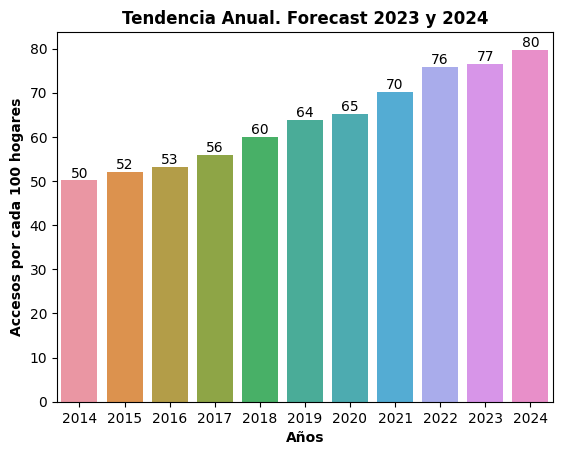

In [567]:
Accesos = trend_nacional_Access_100['Accesos por cada 100 hogares'].tolist() + proyecciones.tolist()
Periodos = trend_nacional_Access_100['Año-Trim'].tolist() + ['2023-1','2023-2','2023-3','2023-4','2024-1','2024-2','2024-3','2024-4']
Años = trend_nacional_Access_100['Año'].tolist() + [2023,2023,2023,2023,2024,2024,2024,2024]

Acceso_Nacional_Forecast = pd.DataFrame({'Año':Años,'Periodos':Periodos, 'Accesos':Accesos})
Acceso_Nacional_Forecast = pd.pivot_table(data=Acceso_Nacional_Forecast, index='Año', values='Accesos', aggfunc='mean').reset_index()
Acceso_Nacional_Forecast


Graphic=sns.barplot(data=Acceso_Nacional_Forecast, x='Año', y='Accesos')

Graphic.set_title('Tendencia Anual. Forecast 2023 y 2024', fontweight='bold')
Graphic.set_xlabel('Años', fontweight='bold')
Graphic.set_ylabel('Accesos por cada 100 hogares', fontweight='bold')

Graphic.bar_label(Graphic.containers[0], fmt='{:,.0f}')

[Text(0, 0, ''),
 Text(0, 0, '3.8'),
 Text(0, 0, '2.2'),
 Text(0, 0, '5.1'),
 Text(0, 0, '7.3'),
 Text(0, 0, '6.5'),
 Text(0, 0, '2.1'),
 Text(0, 0, '7.6'),
 Text(0, 0, '8.1'),
 Text(0, 0, '0.9'),
 Text(0, 0, '4.1')]

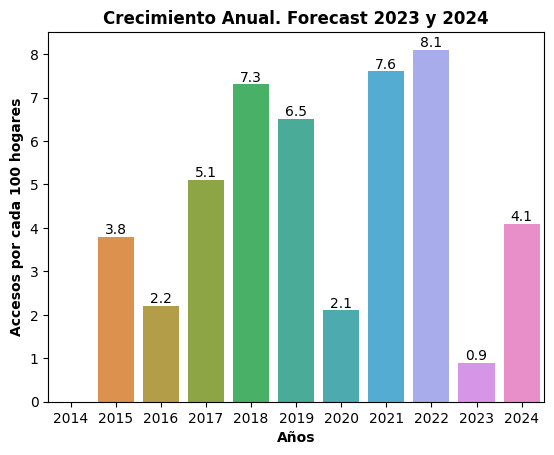

In [560]:
Acceso_Nacional_Forecast['crecimiento'] = round(Acceso_Nacional_Forecast['Accesos'].pct_change()*100,1)
Acceso_Nacional_Forecast

Graphic=sns.barplot(data=Acceso_Nacional_Forecast, x='Año', y='crecimiento')

Graphic.set_title('Crecimiento Anual. Forecast 2023 y 2024', fontweight='bold')
Graphic.set_xlabel('Años', fontweight='bold')
Graphic.set_ylabel('Accesos por cada 100 hogares', fontweight='bold')

Graphic.bar_label(Graphic.containers[0], fmt='{:,.1f}')

In [ ]:
#Crecimiento compuesto hasta el 2022
valor_inicial = Acceso_Nacional_Forecast['Accesos'][0:1].tolist()[0]
valor_final = Acceso_Nacional_Forecast['Accesos'][-3:].tolist()[0] #hasta 2022
numero_periodos = len(Acceso_Nacional_Forecast['Accesos'])-2

crecimiento_compuesto = round(((valor_final / valor_inicial) ** (1 / numero_periodos) - 1) * 100,1)
crecimiento_compuesto
print(f'El crecimiento compuesto de los accesos despues de {numero_periodos} años es: {crecimiento_compuesto}%')

El crecimiento compuesto de los accesos despues de 9 años es: 4.7%


In [ ]:
#Crecimiento compuesto hasta el 2024 (forecast)
valor_inicial = Acceso_Nacional_Forecast['Accesos'][0:1].tolist()[0]
valor_final = Acceso_Nacional_Forecast['Accesos'][-1:].tolist()[0] #hasta 2022
numero_periodos = len(Acceso_Nacional_Forecast['Accesos'])

crecimiento_compuesto = round(((valor_final / valor_inicial) ** (1 / numero_periodos) - 1) * 100,1)
crecimiento_compuesto
print(f'El crecimiento compuesto de los accesos despues de {numero_periodos} años (incluyendo 2 años de forecast. 2023 y 2024) es: {crecimiento_compuesto}%')

El crecimiento compuesto de los accesos despues de 11 años (incluyendo 2 años de forecast. 2023 y 2024) es: 4.3%


**Hallasgoz para los accesos:**  
- Los accesos a internet fijo por cada 100 hogares en argentina tiene un tendencia creciente importante donde:
    Crecimientos compuestos:
    - Crecimiento compuesto hasta 2022: 4.7%
    - Crecimiento compuesto hasta 2024: (forecast): 4.3%
        El crecimiento compuesto de 4.7% hasta 2022, con el forcecast se ve una ligera disminucion en el crecimiento.
    
    Los crecimientos compuestos anteriores (compuestos) son muy conservadores ya que crecimiento de los ultimos 2 años (2021 y 2022) registrado es de 7.6% y 8.1%, los mas grade que a tenido en los registros desde 2015. Por ello se podria esperar crecimeintos superiores al crecimeinto compuesto.

<span style="font-size: 24px; font-weight: bold;">Analisis Nacional ----- Velocidad</span>  

In [ ]:
#Generalidad de la base de datos
source_42_df.head(1)
sources_df[sources_df['nombre_source']=='source_42_df'][['nombre_source', 'cantidad_rows_total','cantidad_columnas', 'descripcion_source','columns']]

,nombre_source,cantidad_rows_total,cantidad_columnas,descripcion_source,columns
8,source_42_df,36,4,_4_Velocidad - Nacional - Trimestre,"[Año, Trimestre, Mbps (Media de bajada), Trime..."


In [ ]:
#Analisis estadistico de los datos. Fuente
report = ProfileReport(source_42_df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Prueba de distribucion normal
_, p_value = shapiro(source_42_df['Mbps (Media de bajada)'])

if p_value < 0.05:
    print(f"Los datos no siguen una distribución normal.{p_value}")
else:
    print(f"Los datos podrían seguir una distribución normal.{p_value}")

Los datos no siguen una distribución normal.3.2584321161266416e-05


**Hallazgos:**  
- Se observa que ya no hay problemas de calidad (duplicados y nulos).
- Tiene gran variabilidad de los datos. CV=0.9. La media y la mediana no estan alineadas.
- No es una distribucion normal. p_value es menor que el nivel de confianza del 95% (Prueba de shapiro).
- Hay 1 valor atipico, ya que es mayor a " Q3 + IQR*1.5 ".

In [569]:
#Concatener Año y Trimestre. Inicialmente tipo numero para calculo de tendencia (minimos cuadrados)
source_42_df['Año-Trim'] = source_42_df['Año'].astype(str) +'-'+ source_42_df['Trimestre'].astype(str)

source_42_df.head(1)

,Año,Trimestre,Mbps (Media de bajada),Fecha,Año-Trim
0,2022,4,106.56,2022-10-01,2022-4


In [570]:
#Realizar la suma por Año y Trimestre. Para grafico
trend_nacional_velocidad = pd.pivot_table(data =source_42_df, index=['Año','Año-Trim'], values='Mbps (Media de bajada)', aggfunc='sum').reset_index()
trend_nacional_velocidad.tail(1)

,Año,Año-Trim,Mbps (Media de bajada)
35,2022,2022-4,106.56


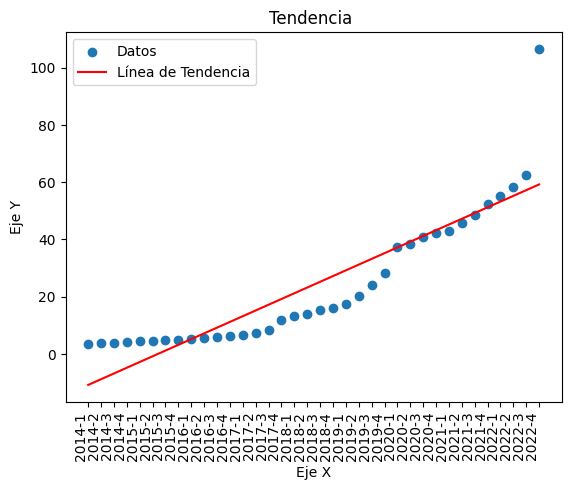

In [571]:
#Calculo de Tendencia con Sk-learn
x = trend_nacional_velocidad.index.values
y = trend_nacional_velocidad['Mbps (Media de bajada)'].values

X = x.reshape(-1, 1)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Obtener las predicciones de la línea de tendencia
trend_line = modelo.predict(X)

# Crear la gráfica
plt.scatter(trend_nacional_velocidad['Año-Trim'], y, label='Datos')
plt.plot(trend_nacional_velocidad['Año-Trim'], trend_line, label='Línea de Tendencia', color='red')
plt.xticks(rotation=90, ha='right')

# Personalizar la gráfica
plt.title('Tendencia ')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

# Mostrar la gráfica
plt.show()

In [572]:
#Calculo del coeficiente de determinacion (R2)
r2 = r2_score(y, trend_line)
print(f'Coeficiente de Determinacion es: {r2}')

Coeficiente de Determinacion es: 0.7960505580528153


**Hallazgo:**  
Se encuentra que el coeficiente de determinacion es 0.79, lo cual significa que la regresion lineal representa bien los datos, tienedo como regla general tener un 0.7 por arriba en la prueba de r2. Aunque el valor atipo en los datos es de la ultima medicion (2022 Trimestre 4, en octubre), lo cual podria ser un incremento en la velocidad o un error en los datos.
Procederemos a basarnos hacer el pronostico sin tener en ceunta este ultimo valor atipico.

In [573]:
trend_nacional_velocidad = trend_nacional_velocidad[trend_nacional_velocidad['Año-Trim']!='2022-4']
trend_nacional_velocidad.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
      dtype='int64')

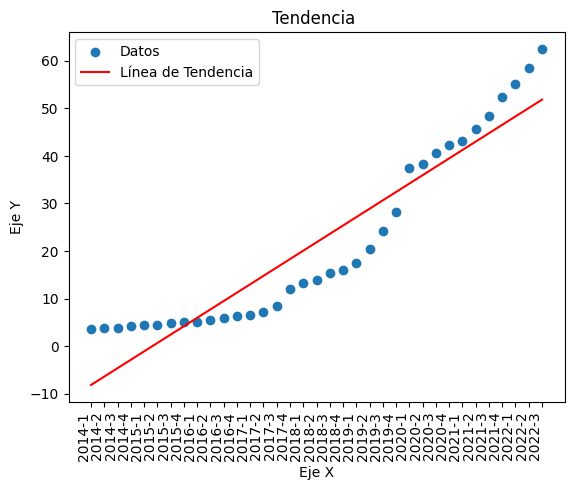

In [574]:
#Calculo de Tendencia con Sk-learn
x = trend_nacional_velocidad.index.values
y = trend_nacional_velocidad['Mbps (Media de bajada)'].values

X = x.reshape(-1, 1)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Obtener las predicciones de la línea de tendencia
trend_line = modelo.predict(X)

# Crear la gráfica
plt.scatter(trend_nacional_velocidad['Año-Trim'], y, label='Datos')
plt.plot(trend_nacional_velocidad['Año-Trim'], trend_line, label='Línea de Tendencia', color='red')
plt.xticks(rotation=90, ha='right')

# Personalizar la gráfica
plt.title('Tendencia ')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

# Mostrar la gráfica
plt.show()

In [575]:
#Calculo del coeficiente de determinacion (R2)
r2 = r2_score(y, trend_line)
print(f'Coeficiente de Determinacion es: {r2}')

Coeficiente de Determinacion es: 0.8824103968839819


Se mejora el r2 en mas 9 puntos porcentuales

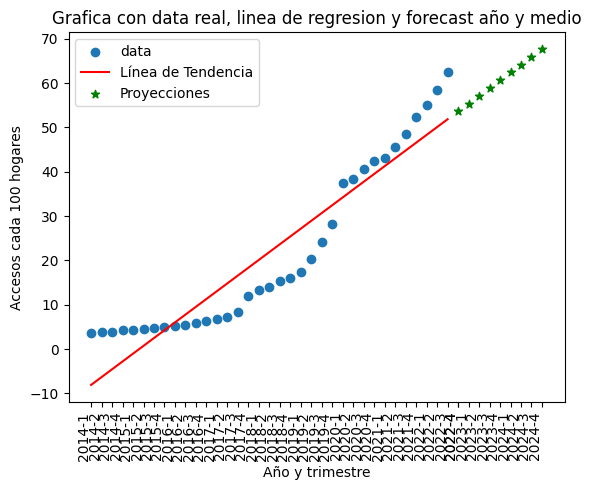

In [576]:
#Proyeccion de los datos medio año hacia adelante
nuevos_trim = (np.array([35,36,37,38,39,40,41,42,43])).reshape(-1,1)
proyecciones = modelo.predict(nuevos_trim)

#Crear grafico
plt.scatter(x,y, label='data')
plt.plot(x,trend_line,label='Línea de Tendencia', color='red')

#Agregar nuevos datos
plt.scatter(nuevos_trim, proyecciones, color='green', label='Proyecciones',marker='*')

#Cambio eje x
eje_x = trend_nacional_Access_100.index.tolist() + [35,36,37,38,39,40,41,42,43]
eje_x_nuevo = trend_nacional_Access_100['Año-Trim'].tolist() + ['2022-4','2023-1','2023-2','2023-3','2023-4','2024-1','2024-2','2024-3','2024-4']
plt.xticks(eje_x,eje_x_nuevo, rotation=90, ha='right')


plt.title('Grafica con data real, linea de regresion y forecast año y medio')
plt.xlabel('Año y trimestre')
plt.ylabel('Accesos cada 100 hogares')
plt.legend()
plt.show()

[Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '9'),
 Text(0, 0, '15'),
 Text(0, 0, '23'),
 Text(0, 0, '40'),
 Text(0, 0, '47'),
 Text(0, 0, '57'),
 Text(0, 0, '58'),
 Text(0, 0, '65')]

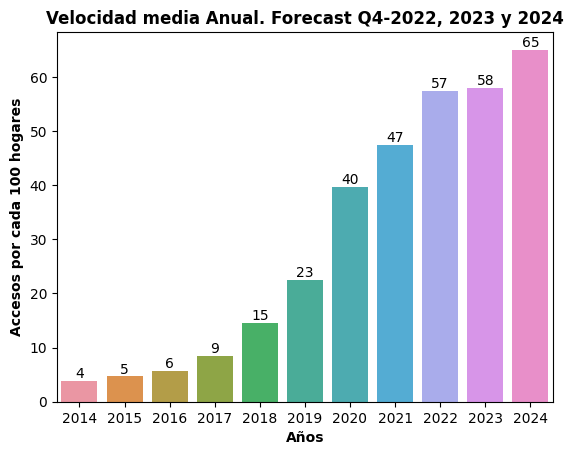

In [582]:
Velocidad = trend_nacional_velocidad['Mbps (Media de bajada)'].tolist() + proyecciones.tolist()
Periodos = trend_nacional_velocidad['Año-Trim'].tolist() + ['2022-4','2023-1','2023-2','2023-3','2023-4','2024-1','2024-2','2024-3','2024-4']
Años = trend_nacional_velocidad['Año'].tolist() + [2022,2023,2023,2023,2023,2024,2024,2024,2024]

Velocidad_Nacional_Forecast = pd.DataFrame({'Año':Años,'Periodos':Periodos, 'Velocidad':Velocidad})
Velocidad_Nacional_Forecast = pd.pivot_table(data=Velocidad_Nacional_Forecast, index='Año', values='Velocidad', aggfunc='mean').reset_index()
Velocidad_Nacional_Forecast


Graphic=sns.barplot(data=Velocidad_Nacional_Forecast, x='Año', y='Velocidad')

Graphic.set_title('Velocidad media Anual. Forecast Q4-2022, 2023 y 2024', fontweight='bold')
Graphic.set_xlabel('Años', fontweight='bold')
Graphic.set_ylabel('Accesos por cada 100 hogares', fontweight='bold')

Graphic.bar_label(Graphic.containers[0], fmt='{:,.0f}')

[Text(0, 0, ''),
 Text(0, 0, '21.3'),
 Text(0, 0, '22.0'),
 Text(0, 0, '49.8'),
 Text(0, 0, '71.1'),
 Text(0, 0, '54.4'),
 Text(0, 0, '76.2'),
 Text(0, 0, '19.3'),
 Text(0, 0, '21.1'),
 Text(0, 0, '1.0'),
 Text(0, 0, '12.2')]

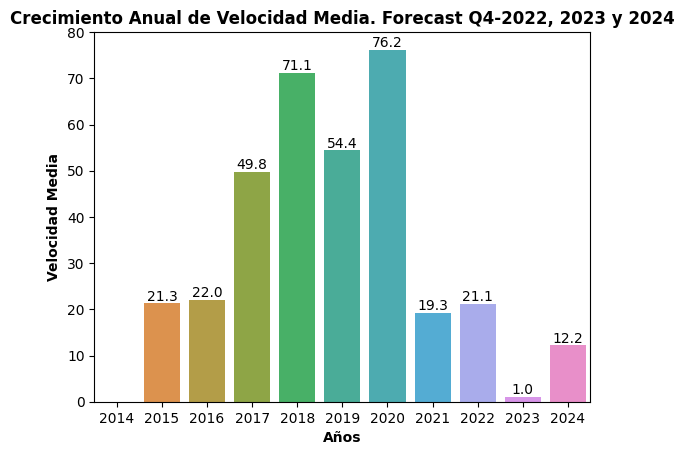

In [583]:
Velocidad_Nacional_Forecast['crecimiento'] = round(Velocidad_Nacional_Forecast['Velocidad'].pct_change()*100,1)
Acceso_Nacional_Forecast

Graphic=sns.barplot(data=Velocidad_Nacional_Forecast, x='Año', y='crecimiento')

Graphic.set_title('Crecimiento Anual de Velocidad Media. Forecast Q4-2022, 2023 y 2024', fontweight='bold')
Graphic.set_xlabel('Años', fontweight='bold')
Graphic.set_ylabel('Velocidad Media', fontweight='bold')

Graphic.bar_label(Graphic.containers[0], fmt='{:,.1f}')

In [586]:
Velocidad_Nacional_Forecast

,Año,Velocidad,crecimiento
0,2014,3.849998,NaN
1,2015,4.668755,21.3
2,2016,5.695848,22.0
3,2017,8.532677,49.8
4,2018,14.595220,71.1
5,2019,22.537500,54.4
6,2020,39.717500,76.2
7,2021,47.385000,19.3
8,2022,57.392528,21.1
9,2023,57.967508,1.0


In [587]:
#Crecimiento compuesto HASTA el 2022
valor_inicial = Velocidad_Nacional_Forecast['Velocidad'][0:1].tolist()[0]
valor_final = Velocidad_Nacional_Forecast['Velocidad'][-3:].tolist()[0] #hasta 2022
numero_periodos = len(Velocidad_Nacional_Forecast['Velocidad'])-2

crecimiento_compuesto = round(((valor_final / valor_inicial) ** (1 / numero_periodos) - 1) * 100,1)
crecimiento_compuesto
print(f'El crecimiento compuesto de los accesos despues de {numero_periodos} años es: {crecimiento_compuesto}%')

El crecimiento compuesto de los accesos despues de 9 años es: 35.0%


In [590]:
#Crecimiento compuesto HASTA el 2024
valor_inicial = Velocidad_Nacional_Forecast['Velocidad'][0:1].tolist()[0]
valor_final = Velocidad_Nacional_Forecast['Velocidad'][-1:].tolist()[0] #hasta 2022
numero_periodos = len(Velocidad_Nacional_Forecast['Velocidad'])-2

crecimiento_compuesto = round(((valor_final / valor_inicial) ** (1 / numero_periodos) - 1) * 100,1)
crecimiento_compuesto
print(f'El crecimiento compuesto de los accesos despues de {numero_periodos} años es: {crecimiento_compuesto}%')

El crecimiento compuesto de los accesos despues de 9 años es: 36.9%


**Hallasgoz para la Velocidad:**  
- Lla velocidad media de bajada de internet fijo en argentina tiene un tendencia creciente importante donde:
    Crecimientos compuestos:
    - Crecimiento compuesto hasta 2022: 35%
    - Crecimiento compuesto hasta 2024: (forecast): 36.9%
        El crecimiento compuesto de 4.7% hasta 2022, se proyecta continue con una ligera disminucion.
    
    Los crecimientos apartir del 2021 comenzaron a desacelerarse de forma importante. Por lo que se podria esperar que para 2023 y 2024 que crezcan por debajo del crecimiento compuesto.

<span style="font-size: 24px; font-weight: bold;">Analisis Nacional ----- Ingresos</span>  

In [594]:
#Generalidad de la base de datos
sources_df
source_7_df.head(1)
sources_df[sources_df['nombre_source']=='source_7_df'][['nombre_source', 'cantidad_rows_total','cantidad_columnas', 'descripcion_source','columns']]

,nombre_source,cantidad_rows_total,cantidad_columnas,descripcion_source,columns
12,source_7_df,36,4,_7_Ingresos - Nacional - Trimestre,"[Año, Trimestre, Ingresos (miles de pesos), Pe..."


In [595]:
#Analisis estadistico de los datos. Fuente
report = ProfileReport(source_7_df)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [597]:
source_7_df.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

In [598]:
#Prueba de distribucion normal
_, p_value = shapiro(source_7_df['Ingresos (miles de pesos)'])

if p_value < 0.05:
    print(f"Los datos no siguen una distribución normal.{p_value}")
else:
    print(f"Los datos podrían seguir una distribución normal.{p_value}")

Los datos no siguen una distribución normal.0.00028735175146721303


**Hallazgos:**  
- Se observa que ya no hay problemas de calidad (duplicados y nulos).
- Tiene gran variabilidad de los datos. CV=0.87. La media y la mediana no estan alineadas.
- No es una distribucion normal. p_value es menor que el nivel de confianza del 95% (Prueba de shapiro).

In [600]:
source_7_df.head(1)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022


In [601]:
#Concatener Año y Trimestre. Inicialmente tipo numero para calculo de tendencia (minimos cuadrados)
source_7_df['Año-Trim'] = source_7_df['Año'].astype(str) +'-'+ source_7_df['Trimestre'].astype(str)

source_7_df.head(1)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Año-Trim
0,2022,4,7.244348e+07,Oct-Dic 2022,2022-4


In [669]:
#Realizar la suma por Año y Trimestre. Para grafico
trend_nacional_ingresos = pd.pivot_table(data =source_7_df, index=['Año','Año-Trim'], values='Ingresos (miles de pesos)', aggfunc='sum').reset_index()
trend_nacional_ingresos.index+=1
trend_nacional_ingresos.head(1)

,Año,Año-Trim,Ingresos (miles de pesos)
1,2014,2014-1,2.984054e+06


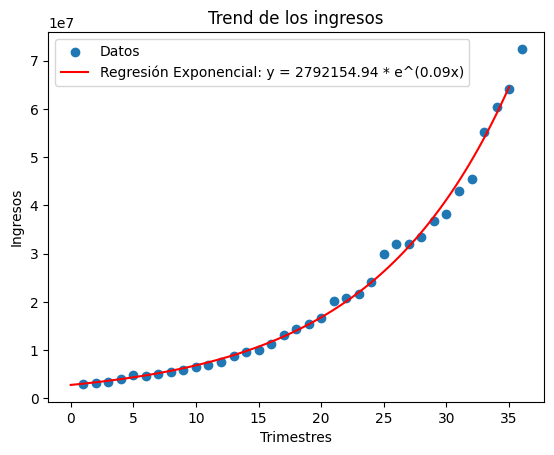

In [692]:
import numpy as np

# Tus datos
x = trend_nacional_ingresos.index.values
y = trend_nacional_ingresos['Ingresos (miles de pesos)'].values

# Definir la función exponencial
def func(x, a, b):
    return a * np.exp(b * x)

# Ajustar la curva a los datos
params, covariance = curve_fit(func, x, y)

# Obtener los parámetros a y b
a, b = params

# Crear la línea de regresión exponencial
x_regresion = np.linspace(0, len(y)-1, 100)
y_regresion = func(x_regresion, a, b)

# Graficar los datos y la regresión exponencial
plt.scatter(x, y, label='Datos')
plt.plot(x_regresion, y_regresion, label=f'Regresión Exponencial: y = {a:.2f} * e^({b:.2f}x)', color='red')

# Personalizar la gráfica
plt.title('Trend de los ingresos')
plt.xlabel('Trimestres')
plt.ylabel('Ingresos')
plt.legend()

# Mostrar la gráfica
plt.show()
